# Exercise #1: Linear Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

## 1. Linear Regression
In ordinary least squares regression, we fit a linear relationship to the data such that the square errors are the smallest. That is, we solve for the coefficients such that

$$
\hat{\beta}_{OLS} = \underset{\beta}{\mathrm{argmin}} {||y-X\beta||_2^2} = \underset{\beta}{\mathrm{argmin}} (y - {X}\beta)^T(y - {X}\beta)
$$

The goal of this exercise is to create our own linear regression model in numpy, and then compare it to a built-in implementation in the scikit-learn package. Define your linear regression model as the class `MyLinearModel`, fit it to the generated data and print out the coefficients. Does the scikit model produce the same coefficients? Similarly, create a function to evaluate the $R^2$ of your model on the generated data? Check your answer with the scikit function `r2_score`.

Note: When fitting scikit models in this exercise, set `fit_intercept=False` since the intercept is accounted for in the data matrix by a column of ones.

Generate some data...

In [2]:
# True coefficients
true_beta = np.array([10, 5, 5])
# Data matrix (first column is 1 for the intercept)
X = np.array([[1, 7, 0],
             [1, 15, 0],
             [1, 3, 0],
             [1, 0, 0.31],
             [1, 0, 0.35],
             [1, 0, 0.33]])
# Generate Y as linear function of X with some Gaussian noise
y = X @ true_beta.reshape(-1, 1) + np.random.normal(size=(6, 1))

print(X.shape, y.shape)

(6, 3) (6, 1)


In [3]:
class MyLinearModel:
    def __init__(self):
        """Implement a linear regression model"""
        self.coefficients = None
        self.isfit = False
        return
    
    def fit(self, X, y):
        """ 
        X: array of shape (n, p)
        y: array of shape (n, 1)
        """
        # Calculate and save the fitted coefficients
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
        self.coefficients = beta_hat
        self.isfit = True
        return
    
    def predict(self, X):
        """ 
        X: array of shape (n, p)
        """
        # Compute the predicted values
        if self.isfit == False:
            raise Exception('Model has not been fitted')
        else:
            y_hat = X @ self.coefficients
        return y_hat

Try out the model on the data and print the coefficients.

In [4]:
my_linear_regression = MyLinearModel()
my_linear_regression.fit(X, y)
my_linear_regression.coefficients

array([[10.09143591],
       [ 5.00204625],
       [ 4.56173786]])

Compare the fitted coefficients to a scikit-learn model. Are the results the same?

In [5]:
linear_regression = LinearRegression(fit_intercept=False) # Intercept is already included in column of 1's in X
linear_regression.fit(X, y)
linear_regression.coef_

array([[10.09143591,  5.00204625,  4.56173786]])

Create a function to evaluate $R^2$ for these results

In [6]:
def my_r2_score(y_true, y_pred):
    """ 
    Evaluate the r2 score on the data
    Params:
    y_true - array of shape (n, 1), the true y labels
    y_pred - array of shape (n, 1), the predicted y labels
    Returns:
    r2 - float, the coefficient of determination
    """
    # Sum of square errors
    SSE = ((y_true - y_pred) ** 2).sum()

    # Sum of square regression 
    SSR = ((y_pred - y_true.mean()) ** 2).sum()

    # Total sum of squares
    SSTO = ((y_true - y_true.mean()) ** 2).sum()
    
    # Coefficient of determination
    r2 = 1 - SSE / SSTO

    return r2

$R^2$ score for our linear model.

In [7]:
y_pred = X @ my_linear_regression.coefficients
my_r2_score(y_true=y, y_pred=y_pred)

0.9997311849913048

$R^2$ using sklearn implementation. Was our answer correct?

In [8]:
r2_score(y_true=y, y_pred=y_pred)

0.9997311849913048

## 2. Ridge Regression
Ridge regularizes the coefficients using the L2-norm, trading in some bias to reduce the variance of the model. That is, instead of the least square, we solve

$$
\hat{\beta}_{ridge} = \underset{\beta}{\mathrm{argmin}} {||y-X\beta||_2^2 + \alpha||\beta||_2^2} = \underset{\beta}{\mathrm{argmin}} (y - {X}\beta)^T(y - {X}\beta) + \alpha\beta^T\beta
$$

a) As before, create your own ridge regression model in numpy, and then compare it to a built-in implementation in the scikit-learn package. Define your model as the class `MyRidgeModel`, and fit it to the generated data. Print out the coefficients after setting the shrinkage parameter `alpha=0`, and compare them to the linear regression coefficients you got for Exercise 1. What do you notice? Then, fit the model with `alpha=0.1`, and check your coefficients compared to the equivalent scikit model. 

b) Next, plot how the coefficients $\beta_1$ and $\beta_2$ change with $\alpha=0, 5, 10, 15, 20, 25$ (ignoring the intercept). Which coefficient is shrunk the most? Explain why this is and what this tells us about ridge regression. 


Hint: plotting a scatterplot of the data will help. Since there is no covariance between $x_1$ and $x_2$, the "principal directions" are the $x_1$ and $x_2$ directions themselves.

In [9]:
class MyRidgeModel:
    def __init__(self, alpha):
        """
        Implement a ridge regression model
        Parmas:
        alpha - float, regulaization factor
        """
        self.coefficients = None
        self.alpha = alpha
        self.isfit = False
        return
    
    def fit(self, X, y):
        """ 
        X: array of shape (n, p)
        y: array of shape (n, 1)
        """
        n, p = X.shape

        # Calculate and save the fitted ridge coefficients
        beta_hat = np.linalg.inv(X.T @ X + self.alpha * np.identity(p)) @ X.T @ y
        self.coefficients = beta_hat
        self.isfit = True
        return
    
    def predict(self, X):
        """ 
        X: array of shape (n, p)
        """
        # Compute the predicted values
        if self.isfit == False:
            raise Exception('Model has not been fitted')
        else:
            y_hat = X @ self.coefficients
        return y_hat

Let's try our ridge model on our data. If we use $\alpha=0$, we should get the same coefficients as the OLS linear regression.

In [10]:
my_ridge_model = MyRidgeModel(alpha=0)
my_ridge_model.fit(X, y)
my_ridge_model.coefficients

array([[10.09143591],
       [ 5.00204625],
       [ 4.56173786]])

Now let's try $\alpha=0.1$. Looks like we get the same answer as scikit-learn.

In [11]:
my_ridge_model = MyRidgeModel(alpha=0.1)
my_ridge_model.fit(X, y)
my_ridge_model.coefficients

array([[10.14859211],
       [ 4.99523202],
       [ 3.36230295]])

In [12]:
ridge_regression = Ridge(alpha=0.1, fit_intercept=False)
ridge_regression.fit(X, y)
ridge_regression.coef_

array([[10.14859211,  4.99523202,  3.36230295]])

After making a plot of how the coefficents for $\beta_1$ and $\beta_2$ change for different $\alpha$, we see that $\beta_2$ is affected by the shrinkage a lot more than $\beta_1$. After creating a scatterplot, we notice that the variance in the $x_1$ direction is much greater than the $x_2$ direction. We know that ridge regression shrinks directions corresponding to the principal component with the least variance the most. In our case, the principal direction of $x_2$ has much less variance than the $x_1$ direction, and that is why the coefficient $\beta_2$ is affected a lot more. For data with no inter-correlations like ours, ridge regression priotizes the features with the most variance, and shrinks the features with less variance.

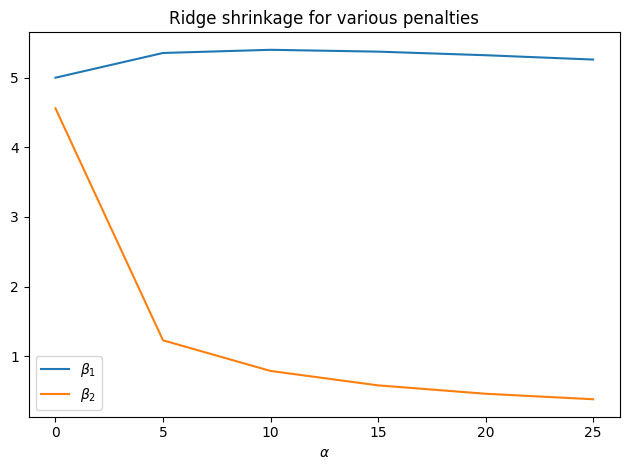

In [13]:
beta1_list = []
beta2_list = []
alpha_list = [0, 5, 10, 15, 20, 25]

for alpha in alpha_list:
    ridge_model = MyRidgeModel(alpha=alpha)
    ridge_model.fit(X, y)
    coefficients = ridge_model.coefficients.flatten()
    beta1_list.append(coefficients[1])
    beta2_list.append(coefficients[2])

plt.plot(alpha_list, beta1_list, label='$\\beta_1$')
plt.plot(alpha_list, beta2_list, label='$\\beta_2$')
plt.xlabel('$\\alpha$')
plt.title('Ridge shrinkage for various penalties')
plt.legend()
plt.tight_layout()
plt.show()

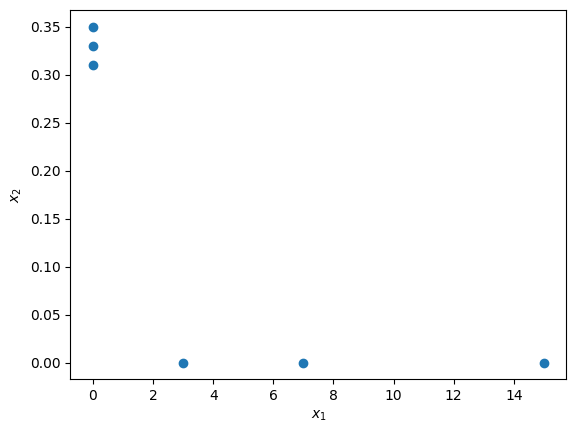

In [14]:
plt.scatter(X[:, 1], X[:, 2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## 3. LASSO Regression
Fit a LASSO model to the data (the scikit implementation is ok), and create a plot comparing the penalty factor $\alpha$ and the coefficients $\beta_1$ and $\beta_2$ as before. Do this for $\alpha=1, 5, 10, 15, 20, 25$. How does LASSO shrink the coefficients compared to ridge?

The LASSO model set $\beta_2$ directly to 0, unlike the ridge model where $\beta_2$ approaches 0 more gradually. The LASSO makes a sparsity assumption, and performs automatic feature selection.

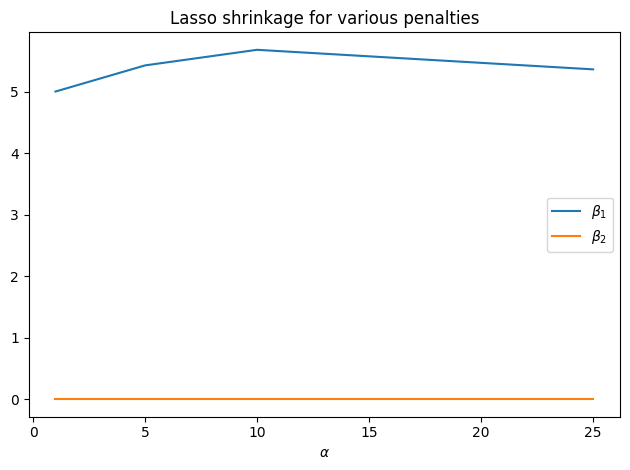

In [15]:
beta1_list = []
beta2_list = []
alpha_list = [1, 5, 10, 15, 20, 25]

for alpha in alpha_list:
    lasso_model = Lasso(alpha=alpha, fit_intercept=False)
    lasso_model.fit(X, y)
    coefficients = lasso_model.coef_.flatten()
    beta1_list.append(coefficients[1])
    beta2_list.append(coefficients[2])

plt.plot(alpha_list, beta1_list, label='$\\beta_1$')
plt.plot(alpha_list, beta2_list, label='$\\beta_2$')
plt.xlabel('$\\alpha$')
plt.title('Lasso shrinkage for various penalties')
plt.legend()
plt.tight_layout()
plt.show()

## 4. California Housing Dataset
Let's practice linear regression using a real dataset. The California Housing Dataset reports the median house price of different blocks in California, as well as a variety of other features such as median income, house age, # bedrooms, # bathrooms, etc. Use 5-fold cross-validation on the training data to compare different linear regression, ridge, and lasso models, and play with feature selection. Test the best model on the hold-out test data.

In [16]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
# Separate features (X) and targets (y)
X = housing.data
y = housing.target

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

First, let's look at the different features. It looks like all the data is floating point type, and there are no missing values.

In [18]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can also visualize the dataset using a correlation matrix. This will help us understand multicollinearity, as well as the correlation with the target variable.

Median income has the highest correlation with house price, following by the # of rooms, latitdue, and house age. In general, it looks like there is not much multicollinearity, except latitude is highly correlated with longitude (unsurprisingly). It may be wise to only use latitude going forward. 

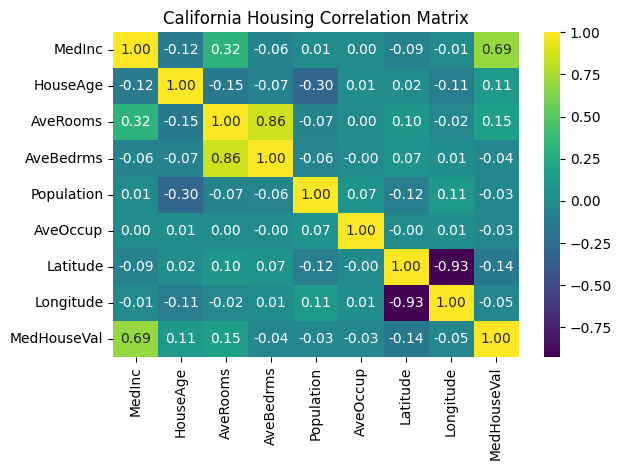

In [19]:
import seaborn as sns

# Correlation matrix on the training data
correlation_matrix_train = pd.concat([X_train, y_train], axis=1).corr()

# Create a heatmap
sns.heatmap(correlation_matrix_train, annot=True, fmt=".2f", cmap='viridis')
plt.title('California Housing Correlation Matrix')
plt.tight_layout()
plt.show()

Now let's setup a function to do cross-validation on the training data.

In [24]:
from sklearn.model_selection import KFold

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def evaluate_kfold(kf, model, X, y):
    """
    Return the average r2 score over k-fold CV. 
    Params:
    kf - scikit-learn KFold object
    model - model object to evaluate (supports .fit() and .predict() methods)
    X, y - np.array, features and targets, respectively
    """
    # Track r2 score for each fold
    r2_list = []

    # Iterate over folds
    for train_index, test_index in kf.split(X):
        # Split the data for current fold
        X_train_k, X_test_k, y_train_k, y_test_k = (X[train_index, :], X[test_index, :],
                                                    y[train_index], y[test_index])
        # Fit the model, get predictions
        model.fit(X_train_k, y_train_k)
        y_hat_k = model.predict(X_test_k)

        # Evaluate the model
        r2_list.append(r2_score(y_true=y_test_k, y_pred=y_hat_k))
    
    # Return score averaged over each fold
    return np.array(r2_list).mean()

Let's start with OLS linear regression. We can play with feature selection and see what set of features produces the highest k-fold R2 score (ranking features based on their correlation with the target).

In [25]:
sorted_y_corr = correlation_matrix_train['MedHouseVal'].sort_values(ascending=False)
sorted_y_corr

MedHouseVal    1.000000
MedInc         0.693267
AveRooms       0.153588
HouseAge       0.105617
Population    -0.025612
AveOccup      -0.032129
AveBedrms     -0.042073
Longitude     -0.045251
Latitude      -0.144613
Name: MedHouseVal, dtype: float64

In [26]:
# List of sorted features
ranked_features = list(sorted_y_corr.index)[1:]

In [27]:
ranked_features[:1]

['MedInc']

In [28]:
# Store r2 scores from selecting top n features using OLS
r2_topn_ols = []

# Try different top features in OLS, and return list of resulting CV scores
for n_top_features in np.arange(len(X_train.columns)):
    # Select top n features
    X_train_top_n = X_train.loc[:, ranked_features[:n_top_features + 1]]
        
    # Run k-fold and save results
    model = LinearRegression(fit_intercept=True)
    r2_topn_ols.append(evaluate_kfold(kf, model, X=X_train_top_n.values, y=y_train.values))


In [29]:
r2_topn_ols

[0.4805112981470215,
 0.4825977018930547,
 0.5172863222772659,
 0.5177863601127171,
 0.5184037532937028,
 0.5390163224151914,
 0.539926327293015,
 0.6061747055592143]

It looks like using all of the features produces the best model using OLS, with a k-fold score of 0.606. Now let's try Ridge with various alpha.

In [68]:
alpha_list = np.arange(0, 10, step=0.1)
r2_kf_ridge = []

for alpha in alpha_list:
    # Run k-fold and save results
    model_ridge = Ridge(fit_intercept=True, alpha=alpha)
    r2_kf_ridge.append(evaluate_kfold(kf, model_ridge, X=X_train.values, y=y_train.values))

pd.DataFrame({'alpha':alpha_list, 
              'ridge_r2':r2_kf_ridge}).sort_values(by='ridge_r2', ascending=False).head()

,alpha,ridge_r2
99,9.9,0.606346
98,9.8,0.606344
97,9.7,0.606343
96,9.6,0.606341
95,9.5,0.606340


Ridge does not seem to offer any meaningful improvement over OLS. Let's finally test the OLS model on the test data.

In [69]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
r2_score(y_pred=model.predict(X_test), y_true=y_test)

0.5911695436410489

The final $R^2$ is 0.59. This is very close to what we got in cross-validation, so there does not appear to be severe overfitting.

Note that we can potentially get better results by removing outlying or influential points from the training data, or trying non-linear terms. Or perhaps, a different model that can handle nonlinear data is better suited for this problem (we will explore this avenue in the future). 